In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Signal + Noise

In [2]:
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n)

# sin wave
signal = np.sin(1.2*2*np.pi*t)
noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = signal + noise

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


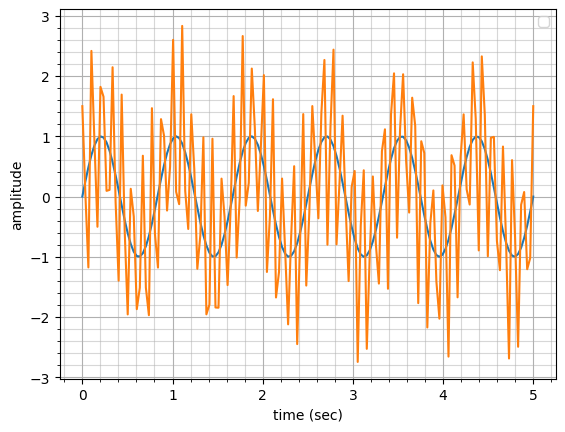

In [3]:
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor', linestyle='-', alpha=0.5)
plt.minorticks_on()
plt.ylabel("amplitude")
plt.xlabel("time (sec)")
plt.legend()
plt.plot(t, signal, label="signal")
plt.plot(t, data, label="noised signal")

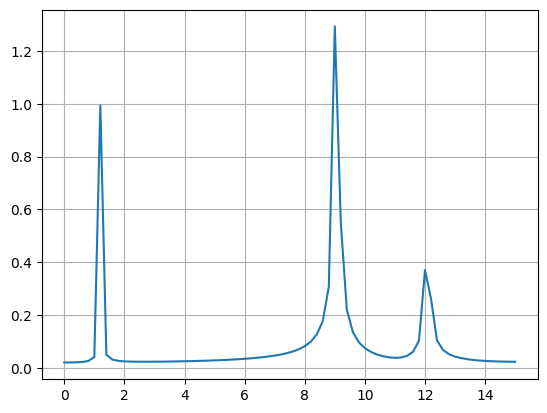

In [4]:
yf = 2 * np.abs(np.fft.rfft(data)) / len(data)
xf = np.fft.rfftfreq(
    n=len(data),             # window length
    d=(1 / fs)    # delta(t) = sample spacing.
)

plt.grid()
plt.plot(xf, yf)
plt.ticklabel_format(scilimits=(-99, 99))
plt.show()

# Low Pass Filter (ba output option)

Not recommended output option. Use ```sos```.

In [5]:
lowcut = 2      # desired cutoff frequency of the filter, Hz
highcut = 9
order = 3       # sin wave can be approx represented as quadratic

In [6]:
def butter_lowpass_filter(
    signal: np.ndarray, 
    sampling_rate: int, 
    cutoff: int, 
    order: int
):
    """Butterworth low-pass filter
    See https://youtu.be/dmzikG1jZpU?t=110
    Args:
        signal: sigal to filter
        sampling_rate: sampling rate to sample the signal
        cutoff: cut-off frequency (Hz)
        order: filter gain paramenter n with larger value gives acute gain change.
    """
    nyquist = int(sampling_rate / 2)
    # Get the filter coefficients 
    b, a = sp.signal.butter(
        N=order, 
        Wn=cutoff / nyquist,
        btype='low', 
        analog=False,
        output="ba"
    )
    y = sp.signal.filtfilt(b, a, signal)
    
    return y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


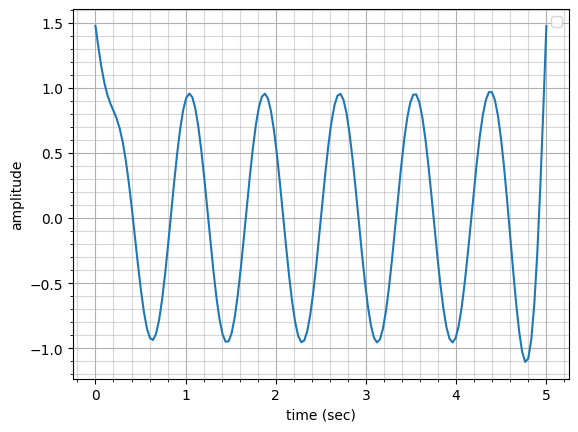

In [7]:
y = butter_lowpass_filter(signal=data, sampling_rate=fs, cutoff=lowcut, order=order)

plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor', linestyle='-', alpha=0.5)
plt.minorticks_on()
plt.ylabel("amplitude")
plt.xlabel("time (sec)")
plt.legend()
plt.plot(t, y, label="filtered signal")

---
# Low Pass Filter (sos output option)

In [8]:
def butter_lowpass_filter(
    signal: np.ndarray, 
    sampling_rate: int, 
    cutoff: int, 
    order: int
):
    """Butterworth low-pass filter
    See https://youtu.be/dmzikG1jZpU?t=110
    Args:
        signal: sigal to filter
        sampling_rate: sampling rate to sample the signal
        cutoff: cut-off frequency (Hz)
        order: filter gain paramenter n with larger value gives acute gain change.
    """
    nyquist = int(sampling_rate / 2)
    # Get the filter coefficients 
    sos = sp.signal.butter(
        N=order, 
        Wn=cutoff / nyquist,
        btype='low', 
        analog=False,
        output="sos"
    )
    y = sp.signal.sosfilt(sos=sos, x=signal)
    
    return y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


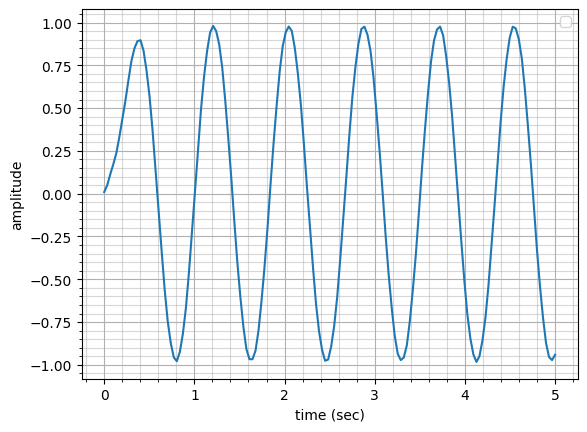

In [9]:
y = butter_lowpass_filter(signal=data, sampling_rate=fs, cutoff=lowcut, order=order)

plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor', linestyle='-', alpha=0.5)
plt.minorticks_on()
plt.ylabel("amplitude")
plt.xlabel("time (sec)")
plt.legend()
plt.plot(t, y, label="filtered signal")

---
# Band Pass Filter (sos output option)

* [How to implement band-pass Butterworth filter with Scipy.signal.butter](https://stackoverflow.com/a/48677312)

In [10]:
def butter_bandpass(
    lowcut, 
    highcut, 
    sampling_rate: int, 
    order: int = 5
):
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    sos = sp.signal.butter(N=order, Wn=[low, high], btype='band', analog=False, output='sos')
    return sos

def butter_bandpass_filter(
    signal, 
    lowcut,
    highcut, 
    sampling_rate: int, 
    order: int=5
):
    sos = butter_bandpass(
        lowcut=lowcut,
        highcut=highcut,
        sampling_rate=sampling_rate, order=order)
    y = sp.signal.sosfilt(sos=sos, x=signal)
    return y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


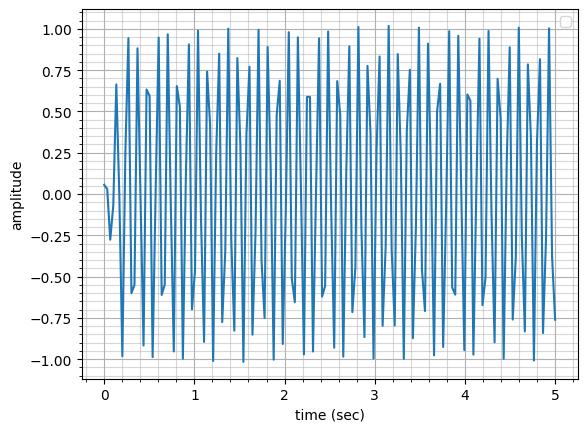

In [11]:
y = butter_bandpass_filter(signal=data, lowcut=5, highcut=highcut, sampling_rate=fs, order=order)

plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor', linestyle='-', alpha=0.5)
plt.minorticks_on()
plt.ylabel("amplitude")
plt.xlabel("time (sec)")
plt.legend()
plt.plot(t, y, label="filtered signal")

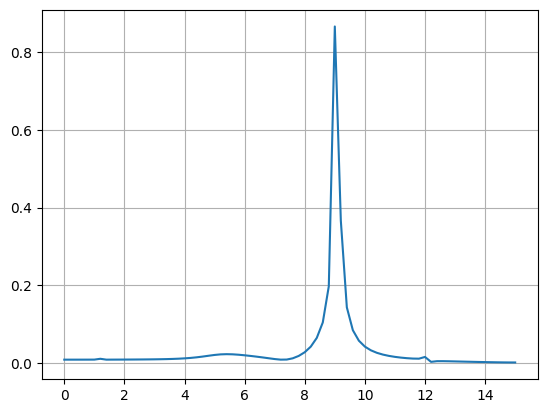

In [12]:
yf = 2 * np.abs(np.fft.rfft(y)) / len(data)
xf = np.fft.rfftfreq(
    n=len(y),             # window length
    d=(1 / fs)    # delta(t) = sample spacing.
)

plt.grid()
plt.plot(xf, yf)
plt.ticklabel_format(scilimits=(-99, 99))
plt.show()

## Bandpass filter response

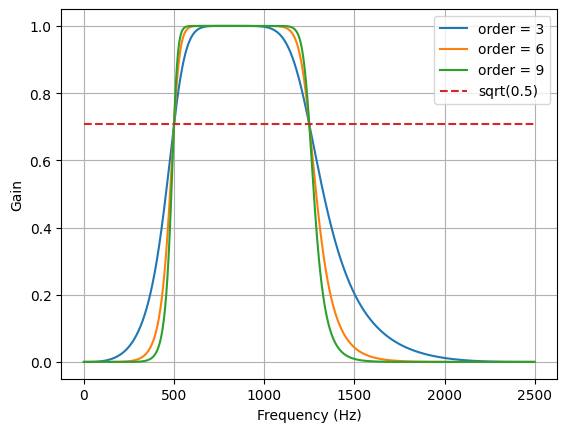

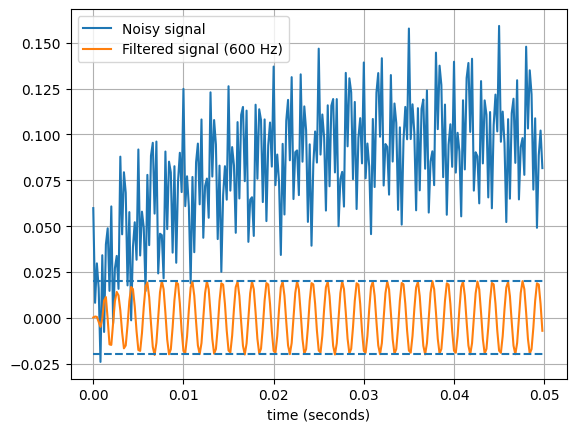

In [13]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 5000.0
lowcut = 500.0
highcut = 1250.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = sp.signal.sosfreqz(sos, worN=2000, fs=fs)
    plt.plot(w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

# Filter a noisy signal.
T = 0.05
nsamples = T * fs
t = np.arange(0, nsamples) / fs
a = 0.02
f0 = 600.0
x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
x += a * np.cos(2 * np.pi * f0 * t + .11)
x += 0.03 * np.cos(2 * np.pi * 2000 * t)
plt.figure(2)
plt.clf()
plt.plot(t, x, label='Noisy signal')

y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
plt.xlabel('time (seconds)')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()